# NLP PROJECT


In [1]:
%pip install nltk


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------------------------------

In [11]:
%pip install spacy

## 1- EDA

### `Time stamp calculation`

In [ ]:
import os
import re

# Define the folder path where transcripts are stored
FOLDER_PATH = r"F:\SEMESTER10\NLP\project\NLP-Project\data\إيه المشكلة\raw_transcripts"

# Function to extract the last timestamp from a transcript
def extract_last_timestamp(file_path):
    try:
        with open(file_path, "r", encoding="utf-8") as file:
            text = file.read()

        # Regex to find timestamps (MM:SS or HH:MM:SS formats)
        timestamp_pattern = r'\s*(\d{1,2}:\d{2}(?::\d{2})?)\s*\n(.+?)(?=\n\s*\d{1,2}:\d{2}|$)'
        matches = re.findall(timestamp_pattern, text, re.DOTALL)

        if matches:
            last_timestamp = matches[-1][0]
            return last_timestamp
        else:
            return "No timestamps found"

    except Exception as e:
        return f"Error reading file: {e}"

# Iterate through all text files in the folder
for filename in os.listdir(FOLDER_PATH):
    if filename.endswith(".txt"):  # Process only .txt files
        file_path = os.path.join(FOLDER_PATH, filename)
        podcast_length = extract_last_timestamp(file_path)
        print(f"📁 File: {filename} | ⏱️ Podcast Length: {podcast_length}")


📁 File: Ep.16 –إيه المشكلة لو مش بنصوم رمضان وليه هو مهم كده ؟.txt | ⏱️ Podcast Length: 2:24:52
📁 File: Ep.17 –إيه المشكلة في المصيف والساحل والرحلات؟.txt | ⏱️ Podcast Length: 1:50:22
📁 File: Ep.18 –إيه المشكلة _في الـ,ـقـ,ـضيـ,ـة الـ,ـفـ,ـلـ,ـسـ,ـطـ,ـيـ,ـنـ,ـيـ,ـة واللي بيحصل في غـ,ـزة؟_.txt | ⏱️ Podcast Length: 1:22:55
📁 File: Ep.6 – إيه المشكلة لو مبنصليش ؟.txt | ⏱️ Podcast Length: 1:42:16
📁 File: إيه المشكلة في الأغاني و الموسيقي ؟.txt | ⏱️ Podcast Length: 1:39:17
📁 File: إيه المشكلة في الذنوب الصغيرة ؟.txt | ⏱️ Podcast Length: 52:05
📁 File: إيه المشكلة في الشتيمة ؟.txt | ⏱️ Podcast Length: 1:00
📁 File: إيه المشكلة في الصحبة و الاختلاط في المدارس و الجامعات ؟!.txt | ⏱️ Podcast Length: 1:26:44
📁 File: إيه المشكلة في الموت ؟.txt | ⏱️ Podcast Length: 1:09:50
📁 File: إيه المشكلة في النسيان ؟.txt | ⏱️ Podcast Length: 43:10
📁 File: إيه المشكلة في قطع الأرحام ؟.txt | ⏱️ Podcast Length: 1:22:06
📁 File: عالمغرب ليلة 1 رمضان.txt | ⏱️ Podcast Length: 29:28
📁 File: عالمغرب ليلة 10 رمضان.txt | 

### `Basic EDA`

In [ ]:
import os
import nltk
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

# Download required NLTK resources
nltk.download('punkt')

# Define dataset path
dataset_path = "../data"

# Store statistics
num_podcasts = 0
num_episodes = 0
total_words = 0
word_counts = []
sentence_lengths = []
all_words = []

[nltk_data] Downloading package punkt to C:\Users\Byte
[nltk_data]     Store\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Iterate through podcast folders
for podcast_folder in os.listdir(dataset_path):
    podcast_path = os.path.join(dataset_path, podcast_folder, "raw_transcripts")  # Go to raw_transcripts/

    if os.path.isdir(podcast_path):  # Ensure it's a valid folder
        num_podcasts += 1
        print(f"\n📢 Processing Podcast: {podcast_folder}")

        for episode_file in os.listdir(podcast_path):
            if episode_file.endswith(".txt"):
                episode_path = os.path.join(podcast_path, episode_file)

                # Read the episode transcript
                with open(episode_path, "r", encoding="utf-8") as file:
                    text = file.read()

                # Tokenize words and sentences
                words = nltk.word_tokenize(text)
                sentences = nltk.sent_tokenize(text)

                # Update statistics
                num_episodes += 1
                total_words += len(words)
                word_counts.append(len(words))
                sentence_lengths.extend([len(nltk.word_tokenize(sent)) for sent in sentences])
                all_words.extend(words)




📢 Processing Podcast: FoodCast

📢 Processing Podcast: أول مرة

📢 Processing Podcast: إيه المشكلة

📢 Processing Podcast: البشمهندس

📢 Processing Podcast: كاروهات

📢 Processing Podcast: من غير مونتاج


In [ ]:
# **1️⃣ Dataset Overview**
print("\n📊 Dataset Overview:")
print(f"📌 Total Podcasts: {num_podcasts}")
print(f"📌 Total Episodes: {num_episodes}")
print(f"📌 Total Words: {total_words}")
print(f"📌 Avg Words per Episode: {round(total_words / num_episodes, 2)}")




📊 Dataset Overview:
📌 Total Podcasts: 6
📌 Total Episodes: 135
📌 Total Words: 826420
📌 Avg Words per Episode: 6121.63


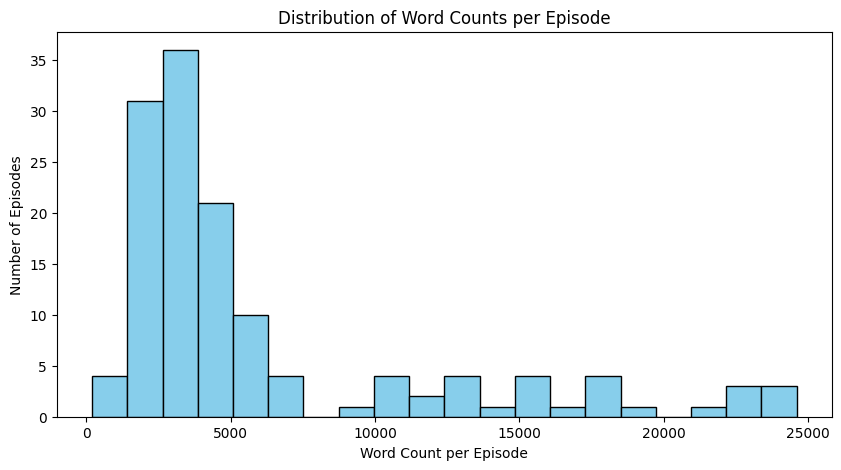

In [ ]:
# **2️⃣ Text Length Analysis**
plt.figure(figsize=(10, 5))
plt.hist(word_counts, bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Word Count per Episode")
plt.ylabel("Number of Episodes")
plt.title("Distribution of Word Counts per Episode")
plt.show()



In [ ]:
# Store word counts
podcast_word_counts = {}

# Iterate through podcast folders
for podcast_folder in os.listdir(dataset_path):
    podcast_path = os.path.join(dataset_path, podcast_folder, "raw_transcripts")  # Go to raw_transcripts/

    if os.path.isdir(podcast_path):  # Ensure it's a valid folder
        podcast_word_counts[podcast_folder] = []  # Create a list to store episode word counts

        for episode_file in os.listdir(podcast_path):
            # Process only `.txt` transcripts, ignore `.json`
            if episode_file.endswith(".txt"):
                episode_path = os.path.join(podcast_path, episode_file)

                # Read the episode transcript
                with open(episode_path, "r", encoding="utf-8") as file:
                    text = file.read()

                # Tokenize words
                words = nltk.word_tokenize(text)

                # Store episode word count
                podcast_word_counts[podcast_folder].append((episode_file, len(words)))

# **1️⃣ Print Word Counts in Structured Format**
for podcast, episodes in podcast_word_counts.items():
    print(f"\n🎙️ Podcast: {podcast}")
    for episode_name, word_count in episodes:
        print(f"  - 📜 {episode_name}: {word_count} words")


🎙️ Podcast: FoodCast
  - 📜 ازاي تفتح مطعم ؟ - من هو الشيف محمد صلاح ملاك اللحمة ؟ - Foodcast 5.txt: 24614 words
  - 📜 خسر في ٥ مطاعم وبدا من الصفر قبل نجاح مطعم ( Maine ماين ) - Foodcast 15.txt: 16743 words
  - 📜 خسرو اكثر من ٤ مليون و للاسباب ديه اوعى تفتح مطعم - Foodcast 17.txt: 19398 words
  - 📜 دكتور اسنان الصبح و فوودبلوجر بليل مع عمرو الهادي - Foodcast 7.txt: 23675 words
  - 📜 رحلة منعش لاكتشاف نفسه من دكتور اسنان الى مصور الى يوتيوبر - Foodcast 10.txt: 21498 words
  - 📜 قصة حلم عمر عربي و نجاحه الرهيب في فيديوهات الطبخ - Foodcast 4.txt: 17393 words
  - 📜 قصة مطعم المحمدي الذي يقوده دكتور جراح - Foodcast 14.txt: 14026 words
  - 📜 قصة مطعم زين الشام - من اقوي مطاعم الشاورما في مصر- Foodcast 16.txt: 12713 words
  - 📜 قصة نجاح احسن مطعم شاورما مصري في مصر - Foodcast 3.txt: 22895 words
  - 📜 كواليس رحلة و أكل اليابان الحلال - Foodcast 6.txt: 14955 words
  - 📜 لیه الدایت بیبوظ - خسر کل فلوسه فی مطعم - کریم امساعیل - Foodcast 2.txt: 24412 words
  - 📜 ما لا تعرفه عن عمرو شريف و كواليس 

In [ ]:
# **3️⃣ Most Frequent Words (Before Stopword Removal)**
word_freq = Counter(all_words)
print("\n🔝 Top 20 Most Frequent Words:")
print(word_freq.most_common(20))


🔝 Top 20 Most Frequent Words:
[('.', 47812), ('في', 20647), ('أنا', 16229), ('يعني', 11695), ('إللي', 10992), ('ده', 9966), ('مش', 9836), ('من', 9518), ('إن', 9220), ('هو', 9190), ('ما', 8318), ('على', 7192), ('بس', 7095), ('إنت', 7012), ('ال', 6431), ('دي', 6106), ('كده', 5275), ('بقى', 4973), ('حاجة', 4941), ('إيه', 4561)]


In [ ]:
# **4️⃣ Unique Word Count (Vocabulary Richness)**
unique_words = set(all_words)
print(f"\n🔠 Unique Words in Dataset: {len(unique_words)}")



🔠 Unique Words in Dataset: 81597


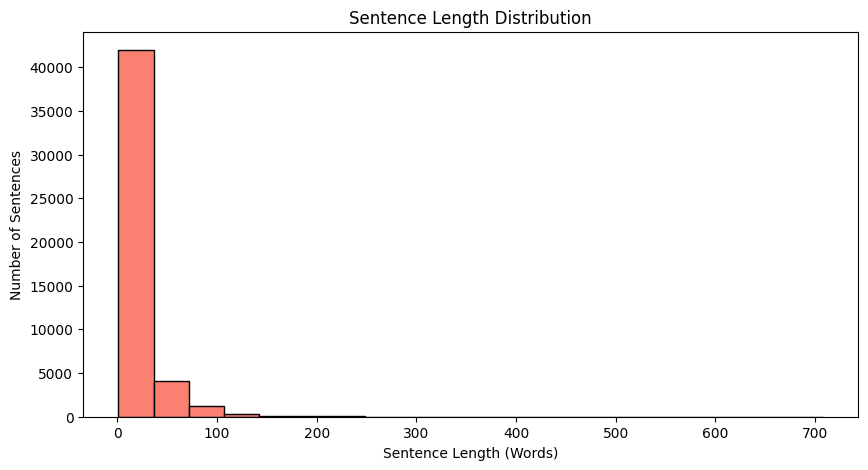

In [ ]:

# **5️⃣ Sentence Length Distribution**
plt.figure(figsize=(10, 5))
plt.hist(sentence_lengths, bins=20, color='salmon', edgecolor='black')
plt.xlabel("Sentence Length (Words)")
plt.ylabel("Number of Sentences")
plt.title("Sentence Length Distribution")
plt.show()

[nltk_data] Downloading package punkt to C:\Users\Byte
[nltk_data]     Store\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!



📢 Processing Podcast: FoodCast

📢 Processing Podcast: أول مرة

📢 Processing Podcast: إيه المشكلة

📢 Processing Podcast: البشمهندس

📢 Processing Podcast: كاروهات

📢 Processing Podcast: من غير مونتاج

📊 Average Sentence Length Per Podcast:
🎙️ FoodCast: 14.05 words per sentence
🎙️ أول مرة: 20.54 words per sentence
🎙️ إيه المشكلة: 13.57 words per sentence
🎙️ البشمهندس: 26.99 words per sentence
🎙️ كاروهات: 23.33 words per sentence
🎙️ من غير مونتاج: 37.81 words per sentence


C:\Users\Byte Store\AppData\Local\Temp\ipykernel_10980\169680362.py:46: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(podcast_sentence_lengths.values(), labels=podcast_sentence_lengths.keys(), patch_artist=True)


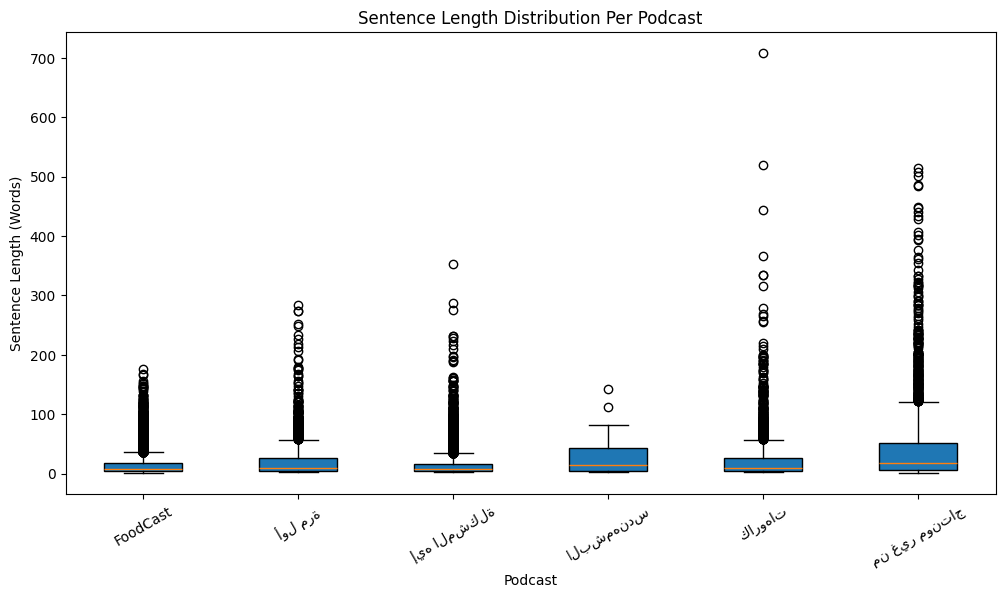

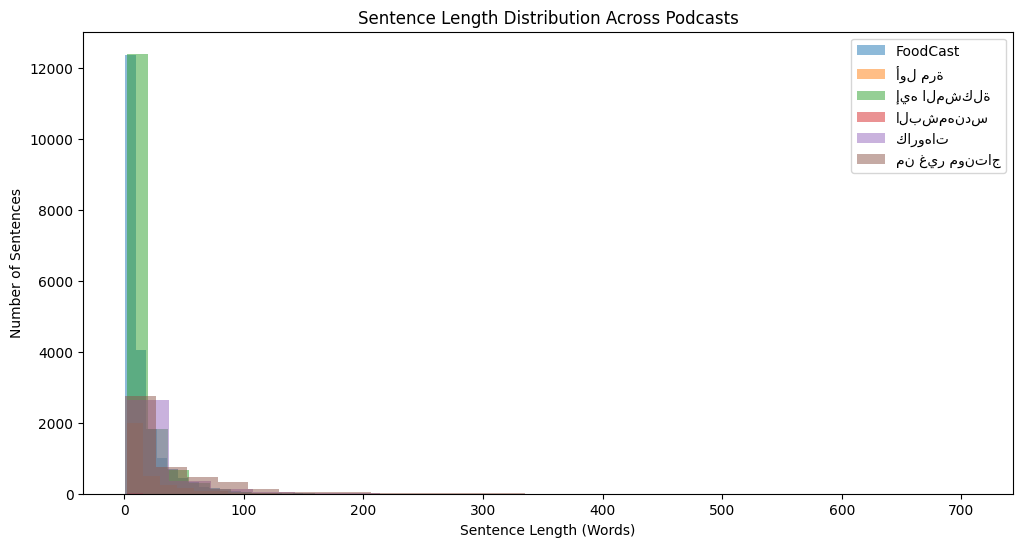

In [ ]:
import os
import nltk
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# Download required NLTK resources
nltk.download('punkt')

# Define dataset path (Move up one level from `src/`)
dataset_path = "../data"

# Store sentence lengths for each podcast
podcast_sentence_lengths = defaultdict(list)

# Iterate through podcast folders
for podcast_folder in os.listdir(dataset_path):
    podcast_path = os.path.join(dataset_path, podcast_folder, "raw_transcripts")  # Go to raw_transcripts/

    if os.path.isdir(podcast_path):  # Ensure it's a valid folder
        print(f"\n📢 Processing Podcast: {podcast_folder}")

        for episode_file in os.listdir(podcast_path):
            if episode_file.endswith(".txt"):  # Process only transcripts, ignore metadata
                episode_path = os.path.join(podcast_path, episode_file)

                # Read the episode transcript
                with open(episode_path, "r", encoding="utf-8") as file:
                    text = file.read()

                # Tokenize sentences and calculate sentence lengths
                sentences = nltk.sent_tokenize(text)
                sentence_lengths = [len(nltk.word_tokenize(sent)) for sent in sentences]

                # Store sentence lengths for this podcast
                podcast_sentence_lengths[podcast_folder].extend(sentence_lengths)

# **1️⃣ Print Average Sentence Length Per Podcast**
print("\n📊 Average Sentence Length Per Podcast:")
for podcast, lengths in podcast_sentence_lengths.items():
    avg_length = round(np.mean(lengths), 2)
    print(f"🎙️ {podcast}: {avg_length} words per sentence")

# **2️⃣ Visualizing Sentence Lengths for Each Podcast (Box Plot)**
plt.figure(figsize=(12, 6))
plt.boxplot(podcast_sentence_lengths.values(), labels=podcast_sentence_lengths.keys(), patch_artist=True)
plt.xlabel("Podcast")
plt.ylabel("Sentence Length (Words)")
plt.title("Sentence Length Distribution Per Podcast")
plt.xticks(rotation=30)  # Rotate x-axis labels for readability
plt.show()

# **3️⃣ Sentence Length Histogram for Each Podcast**
plt.figure(figsize=(12, 6))
for podcast, lengths in podcast_sentence_lengths.items():
    plt.hist(lengths, bins=20, alpha=0.5, label=podcast)

plt.xlabel("Sentence Length (Words)")
plt.ylabel("Number of Sentences")
plt.title("Sentence Length Distribution Across Podcasts")
plt.legend()
plt.show()


In [ ]:
from collections import Counter

# Example dataset (list of sentences)
dataset = [
    "انا عايز اشتري حاجة جديدة.",
    "ايه رايك في الموبايل ده؟",
    "مش عارف اعمل ايه.",
    "طب تمام، ماشي."
]

# Tokenize and count words
word_counts = Counter(" ".join(dataset).split())

# Print the most common words
print(word_counts.most_common(20))  # Manually filter frequent unimportant words


[('انا', 1), ('عايز', 1), ('اشتري', 1), ('حاجة', 1), ('جديدة.', 1), ('ايه', 1), ('رايك', 1), ('في', 1), ('الموبايل', 1), ('ده؟', 1), ('مش', 1), ('عارف', 1), ('اعمل', 1), ('ايه.', 1), ('طب', 1), ('تمام،', 1), ('ماشي.', 1)]


### `Word Cloud`

In [ ]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Byte Store\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


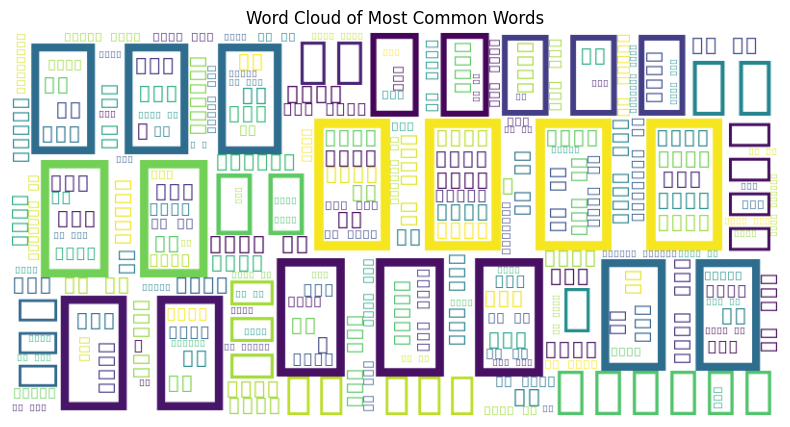

In [ ]:

# **6️⃣ Word Cloud (Most Common Words)**
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(all_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Most Common Words")
plt.show()

[nltk_data] Downloading package punkt to C:\Users\Byte
[nltk_data]     Store\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


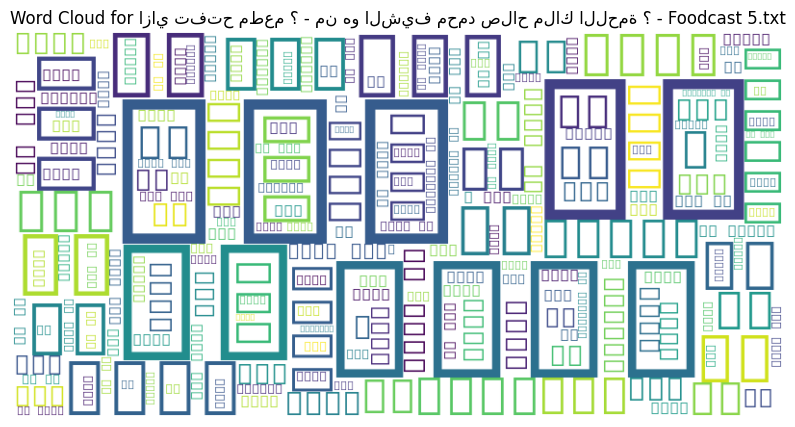

In [ ]:
import os
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Download necessary resources
nltk.download('punkt')

# Define dataset path (Move up one level from `src/`)
dataset_path = "../data"

# **1️⃣ Select a Specific Podcast and Episode**
podcast_name = "FoodCast"  # Change to any podcast name
episode_name = "ازاي تفتح مطعم ؟ - من هو الشيف محمد صلاح ملاك اللحمة ؟ - Foodcast 5.txt"  # Change to any episode file

# **2️⃣ Construct Full Path to the Episode**
episode_path = os.path.join(dataset_path, podcast_name, "raw_transcripts", episode_name)

# **3️⃣ Check if File Exists**
if not os.path.exists(episode_path):
    print(f"❌ Error: The file {episode_name} does not exist in {podcast_name}/raw_transcripts/")
else:
    # **4️⃣ Read the Episode Transcript**
    with open(episode_path, "r", encoding="utf-8") as file:
        text = file.read()

    # **5️⃣ Tokenize Words**
    words = nltk.word_tokenize(text)

    # **6️⃣ Generate and Display Word Cloud**
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(words))
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for {episode_name}")
    plt.show()


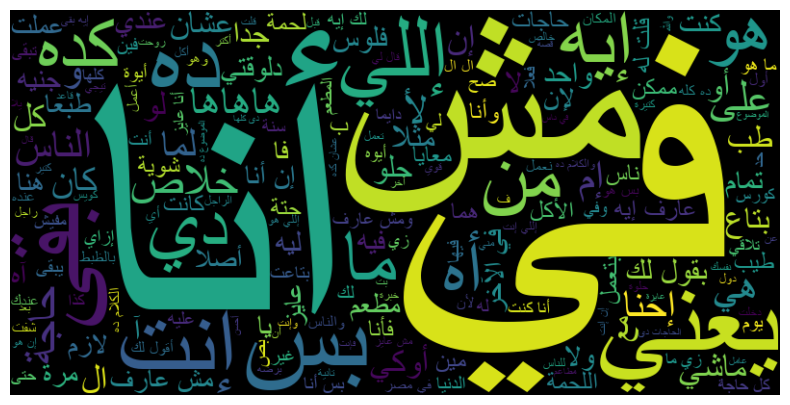

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import arabic_reshaper
from bidi.algorithm import get_display
import os

# Define the relative file path (use a raw string to avoid escape issues)
dataset_path = "../data"

# **1️⃣ Select a Specific Podcast and Episode**
podcast_name = "FoodCast"  # Change to any podcast name
episode_name = "ازاي تفتح مطعم ؟ - من هو الشيف محمد صلاح ملاك اللحمة ؟ - Foodcast 5.txt"  # Change to any episode file

# **2️⃣ Construct Full Path to the Episode**
episode_path = os.path.join(dataset_path, podcast_name, "raw_transcripts", episode_name)


# Ensure the file path is correct
if not os.path.exists(episode_path):
    print("Error: File not found!")
else:
    # Read Arabic text from file
    with open(episode_path, "r", encoding="utf-8") as file:
        text = file.read()

    # Fix Arabic formatting
    reshaped_text = arabic_reshaper.reshape(text)  # Connects letters properly
    bidi_text = get_display(reshaped_text)  # Ensures proper right-to-left display

    # Generate word cloud
    wordcloud = WordCloud(font_path="arial.ttf", width=800, height=400, colormap="viridis").generate(bidi_text)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")  # Hide axes
    plt.show()


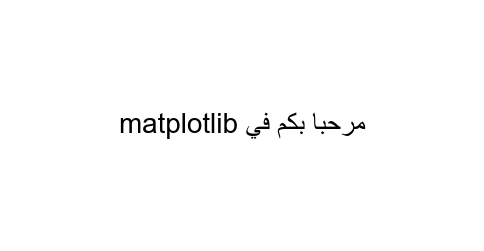

In [ ]:
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

# Sample Arabic text
text = "مرحبا بكم في matplotlib"

# Reshape and fix Arabic text direction
reshaped_text = arabic_reshaper.reshape(text)
bidi_text = get_display(reshaped_text)

# Plot text
plt.figure(figsize=(6,3))
plt.text(0.5, 0.5, bidi_text, fontsize=20, fontname='Arial', ha='center', va='center')

# Hide axes
plt.axis("off")
plt.show()


In [ ]:
%pip install arabic-reshaper python-bidi

Note: you may need to restart the kernel to use updated packages.


### `Sentiment Analysis`

In [ ]:
from transformers import pipeline

# Load Arabic Sentiment Model
sentiment_pipeline = pipeline("text-classification", model="aubmindlab/bert-base-arabertv02-twitter")

# Example sentences
texts = ["حلو اوي", "وحش اوي"]

# Perform Sentiment Analysis
results = sentiment_pipeline(texts)

# Print results
for text, result in zip(texts, results):
    print(f"Text: {text} | Sentiment: {result['label']} | Score: {result['score']:.2f}")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at aubmindlab/bert-base-arabertv02-twitter and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Text: حلو اوي | Sentiment: LABEL_1 | Score: 0.57
Text: وحش اوي | Sentiment: LABEL_1 | Score: 0.52


In [ ]:
%pip install camel_tools

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Byte Store\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [ ]:
import camel_tools
print(camel_tools.__file__)

c:\Users\Byte Store\AppData\Local\Programs\Python\Python310\lib\site-packages\camel_tools\__init__.py


In [ ]:
import os
os.environ["CAMELTOOLS_DATA"] = "c:\Users\Byte Store\AppData\Local\Programs\Python\Python310\lib\site-packages\camel_tools\__init__.py"

In [ ]:
import os
print(os.getenv("CAMELTOOLS_DATA")) 

None


### `NER`

In [ ]:
from camel_tools.ner import NERecognizer

# Load Pretrained NER Model
ner = NERecognizer.pretrained()

# Sample Egyptian Arabic text
text = "راح محمد القاهره و قابل اميره في سيتي ستارز."

# Predict named entities
entities = ner.predict_sentence(text)

print(entities)


OSError: Incorrect path_or_model_id: 'C:\Users\Byte Store\AppData\Roaming\camel_tools\data\ner\arabert'. Please provide either the path to a local folder or the repo_id of a model on the Hub.

In [ ]:
%pip install transformers

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Byte Store\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline

# Load Correct Arabic NER Model
model_name = "hatmimoha/arabic-ner"  # ✅ This model is trained for NER
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForTokenClassification.from_pretrained(model_name)

# Create NER Pipeline
ner_pipeline = pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="simple")

# Sample Arabic Text
text = "راح محمد القاهره و قابل اميره في سيتي ستارز."

# Perform NER
raw_entities = ner_pipeline(text)

# Print Output
for entity in raw_entities:
    print(entity)


tokenizer_config.json:   0%|          | 0.00/411 [00:00<?, ?B/s]

c:\Users\Byte Store\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Byte Store\.cache\huggingface\hub\models--hatmimoha--arabic-ner. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.txt:   0%|          | 0.00/334k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/837k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

ConnectionError: (ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')), '(Request ID: 62873b51-10bf-4d60-ae03-8ac82dc99235)')

In [ ]:
ner_pipeline = pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="simple")

# Sample Arabic Text
text = "راح محمد القاهره و قابل اميره في سيتي ستارز."

# Perform NER
raw_entities = ner_pipeline(text)

# Print raw output
for entity in raw_entities:
    print(entity)


{'entity_group': 'LABEL_1', 'score': 0.84711236, 'word': 'راح محمد القا', 'start': 0, 'end': 13}
{'entity_group': 'LABEL_0', 'score': 0.55175775, 'word': '##هره', 'start': 13, 'end': 16}
{'entity_group': 'LABEL_1', 'score': 0.78851813, 'word': 'و قابل اميره في سيتي', 'start': 17, 'end': 37}
{'entity_group': 'LABEL_0', 'score': 0.56977713, 'word': 'ستارز', 'start': 38, 'end': 43}
{'entity_group': 'LABEL_1', 'score': 0.7095259, 'word': '.', 'start': 43, 'end': 44}


In [ ]:
# Sample Egyptian Arabic text
text = "راح محمد القاهره و قابل اميره في سيتي ستارز."

# Predict named entities
entities = ner_pipeline(text)
print(entities)

[{'entity': 'LABEL_1', 'score': 0.8313243, 'index': 1, 'word': 'راح', 'start': 0, 'end': 3}, {'entity': 'LABEL_1', 'score': 0.84108275, 'index': 2, 'word': 'محمد', 'start': 4, 'end': 8}, {'entity': 'LABEL_1', 'score': 0.8689299, 'index': 3, 'word': 'القا', 'start': 9, 'end': 13}, {'entity': 'LABEL_0', 'score': 0.55175775, 'index': 4, 'word': '##هره', 'start': 13, 'end': 16}, {'entity': 'LABEL_1', 'score': 0.7749742, 'index': 5, 'word': 'و', 'start': 17, 'end': 18}, {'entity': 'LABEL_1', 'score': 0.816229, 'index': 6, 'word': 'قابل', 'start': 19, 'end': 23}, {'entity': 'LABEL_1', 'score': 0.88629353, 'index': 7, 'word': 'امير', 'start': 24, 'end': 28}, {'entity': 'LABEL_1', 'score': 0.7860101, 'index': 8, 'word': '##ه', 'start': 28, 'end': 29}, {'entity': 'LABEL_1', 'score': 0.83048147, 'index': 9, 'word': 'في', 'start': 30, 'end': 32}, {'entity': 'LABEL_1', 'score': 0.6371207, 'index': 10, 'word': 'سيتي', 'start': 33, 'end': 37}, {'entity': 'LABEL_0', 'score': 0.56977713, 'index': 11, 

In [ ]:
import farasa
from farasa.ner import FarasaNamedEntityRecognizer

ner = FarasaNamedEntityRecognizer()
text = "راح محمد القاهره و قابل اميره في سيتي ستارز."
entities = ner.ner(text)
print(entities)

ModuleNotFoundError: No module named 'farasa.ner'

## 2- PREPROCESSING

want to do: remove punctuation, numbers, extra letters and extra spaces

In [2]:
import nltk
import spacy
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.isri import ISRIStemmer
from nltk.corpus import stopwords
import camel_tools.utils.dediac as dediac 

# Download necessary Arabic resources
nltk.download('punkt')
nltk.download('stopwords')

# Arabic Tokenization
text = "دا مثال بالمصري اما نشوف هيعرف يعمله ولا لا."

# Sentence Tokenization
sentences = sent_tokenize(text)  

# Word Tokenization
words = word_tokenize(text)  

# Removing Diacritics (for better processing)
clean_text = dediac.dediac_ar(text)

# Stemming (Arabic ISRI Stemmer)
stemmer = ISRIStemmer()
stems = [stemmer.stem(word) for word in words]

# Stopword Removal
stop_words = set(stopwords.words('arabic'))
filtered_words = [word for word in words if word not in stop_words]

# Print Results
print("Tokenized Sentences:", sentences)
print("Tokenized Words:", words)
print("Cleaned Text (No Diacritics):", clean_text)
print("Stemmed Words:", stems)
print("Filtered Words (No Stopwords):", filtered_words)


ModuleNotFoundError: No module named 'spacy'

### `Tokenization`

In [ ]:
import os
import json
import spacy

# Load Arabic spaCy model
nlp = spacy.blank("ar")

# Add sentence boundary detection (Sentencizer)
if "senter" not in nlp.pipe_names:
    nlp.add_pipe("sentencizer")  

# Define paths
RAW_PODCASTS_FOLDER = r"F:\SEMESTER10\NLP\project\NLP-Project\data\إيه المشكلة\raw_transcripts"
TOKENIZED_FOLDER = r"F:\SEMESTER10\NLP\project\NLP-Project\data\إيه المشكلة\tokenized"  # Folder to save tokenized files

# Ensure output folder exists
os.makedirs(TOKENIZED_FOLDER, exist_ok=True)

# Loop through podcast transcript files
for filename in os.listdir(RAW_PODCASTS_FOLDER):
    if filename.endswith(".txt"):
        file_path = os.path.join(RAW_PODCASTS_FOLDER, filename)

        # Read podcast transcript
        with open(file_path, "r", encoding="utf-8") as file:
            text = file.read()

        # Process text with spaC
        doc = nlp(text)

        # Tokenization using spaCy
        sentences = [sent.text for sent in doc.sents]  # Sentence tokenization (now fixed)
        words = [token.text for token in doc]  # Word tokenization

        # Save results as JSON
        output_data = {
            "filename": filename,
            "sentences": sentences,
            "words": words,
        }
        output_file = os.path.join(TOKENIZED_FOLDER, filename.replace(".txt", "_tokenized.json"))

        with open(output_file, "w", encoding="utf-8") as out_file:
            json.dump(output_data, out_file, ensure_ascii=False, indent=4)

        print(f"Tokenized and saved: {output_file}")

print("✅ All podcasts are tokenized and saved!")

In [ ]:
# Post pre-processing EDA

import json
import os
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

# Define paths
TOKENIZED_FOLDER = r"F:\SEMESTER10\NLP\project\NLP-Project\data\إيه المشكلة\tokenized"

# Store podcast stats
podcast_names = []
avg_sentence_lengths = []

# Loop through tokenized files
for filename in os.listdir(TOKENIZED_FOLDER):
    if filename.endswith("_tokenized.json"):
        file_path = os.path.join(TOKENIZED_FOLDER, filename)

        # Load tokenized data
        with open(file_path, "r", encoding="utf-8") as file:
            data = json.load(file)

        # Calculate stats
        num_sentences = len(data["sentences"])
        num_words = len(data["words"])
        avg_words_per_sentence = num_words / num_sentences if num_sentences > 0 else 0

        # Store results
        podcast_name = filename.replace("_tokenized.json", "")
        reshaped_name = arabic_reshaper.reshape(podcast_name)  # Fix Arabic shaping
        display_name = get_display(reshaped_name)  # Fix RTL direction
        podcast_names.append(display_name)
        avg_sentence_lengths.append(avg_words_per_sentence)

# Set Arabic font
plt.rcParams['font.family'] = 'Arial Unicode MS'  # Use 'Tahoma' or 'Geeza Pro' if needed

# Plot the data
plt.figure(figsize=(12, 6))
plt.barh(podcast_names, avg_sentence_lengths, color="skyblue")
plt.xlabel("avg word count per sentence")  # Arabic label
plt.ylabel("podcast")  # Arabic label
plt.title("مقارنة طول الجملة بين البودكاستات")  # Arabic title
plt.gca().invert_yaxis()  # Flip order for readability
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show plot
plt.show()


KeyboardInterrupt: 

### `Stop word removal`

awzeen n-get the most frequent stop words for each podcast (using a random episode of each, say the first one), and save them in a json file cumulatively,  then use this file to remove stop words from the whole dataset

In [ ]:
import nltk
from nltk.corpus import stopwords

# Download Arabic stopwords
nltk.download('stopwords')

# Load Standard Arabic Stopwords
msa_stopwords = set(stopwords.words('arabic'))

# Custom Egyptian Arabic Stopwords
egyptian_dialect_stopwords = {
    "ايه", "ليه", "اه", "مش", "انا", "انت", "احنا", "انتو", "هو", "هي",
    "طب", "كدة", "كده", "عايز", "عاوزه", "يعني", "بص", "ماشي", "خالص", "بالظبط",
    "اوو", "تمام", "اصلا", "اصلي", "اوكي", "اوك", "برضه", "اهو", "اها", "بقى", "خلاص",
    "ده", "دي", "دول", "حاجة", "حاجه", "حاجات", "واحد", "اثنين", "تلاتة", "اربعة"
}

# Combine MSA and Egyptian Arabic stopwords
combined_stopwords = msa_stopwords.union(egyptian_dialect_stopwords)

# Example Text (Egyptian Arabic)
text = "انا عايز اشتري حاجة بس مش عارف اختار ايه."

# Tokenization (Simple Split for Example)
words = text.split()

# Removing Stopwords
filtered_words = [word for word in words if word not in combined_stopwords]

print("Filtered Words:", filtered_words)


Filtered Words: ['اشتري', 'عارف', 'اختار', 'ايه.']


[nltk_data] Downloading package stopwords to C:\Users\Byte
[nltk_data]     Store\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import os
import json
import re
import nltk
import numpy as np
from collections import Counter
from nltk.corpus import stopwords

# Ensure NLTK stopwords are downloaded
nltk.download('stopwords')

# Path to tokenized podcast folder
TOKENIZED_FOLDER = r"F:\SEMESTER10\NLP\project\NLP-Project\data\إيه المشكلة\tokenized"
OUTPUT_FOLDER = r"F:\SEMESTER10\NLP\project\NLP-Project\data\إيه المشكلة\cleaned"

# Create output directory if not exists
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# Load Standard Arabic Stopwords
msa_stopwords = set(stopwords.words('arabic'))

# Custom Egyptian Arabic Stopwords
egyptian_dialect_stopwords = {
    "ايه", "ليه", "اه", "مش", "انا", "انت", "احنا", "انتو", "هو", "هي",
    "طب", "كدة", "كده", "عايز", "عاوزه", "يعني", "بص", "ماشي", "خالص", "بالظبط",
    "اوو", "تمام", "اصلا", "اصلي", "اوكي", "اوك", "برضه", "اهو", "اها", "بقى", "خلاص",
    "ده", "دي", "دول", "حاجة", "حاجه", "حاجات", "واحد", "اثنين", "تلاتة", "اربعة"
}

# Combine both stopword lists
combined_stopwords = msa_stopwords.union(egyptian_dialect_stopwords)

# Regex pattern to match timestamps (e.g., 00:12:34 or [00:12:34])
timestamp_pattern = r"\[?\b\d{1,2}:\d{2}(:\d{2})?\b\]?"
contains_number_pattern = r"\w*\d+\w*"  # Remove words containing numbers


# Store all words across podcasts for frequency analysis
all_words = []

# Step 1: Load all tokenized podcast data
podcast_data = {}
for filename in os.listdir(TOKENIZED_FOLDER):
    if filename.endswith("_tokenized.json"):
        file_path = os.path.join(TOKENIZED_FOLDER, filename)

        with open(file_path, "r", encoding="utf-8") as file:
            data = json.load(file)

        # Store words for frequency analysis
        all_words.extend(data["words"])

        # Store original words and sentences
        podcast_data[filename] = {
            "sentences": data["sentences"],
            "words": data["words"]
        }

# Step 2: Find dynamic stopwords using frequency analysis
word_frequencies = Counter(all_words)
freq_values = np.array(list(word_frequencies.values()))

# Dynamic threshold: Top 5% most frequent words
threshold = np.percentile(freq_values, 99.8)

# Identify dataset-specific stopwords
dynamic_stopwords = {word for word, freq in word_frequencies.items() if freq >= threshold}

# Final stopword set (Standard + Egyptian + Dataset-Specific)
final_stopwords = combined_stopwords.union(dynamic_stopwords)

# Step 3: Remove stopwords, timestamps, and newlines
for filename, data in podcast_data.items():
    cleaned_sentences = data["sentences"];
    cleaned_words = []

    # for sentence in data["sentences"]:
    #     # Remove timestamps and newlines
    #     cleaned_sentence = re.sub(timestamp_pattern, "", sentence)  # Remove timestamps
    #     cleaned_sentence = cleaned_sentence.replace("\n", " ").strip()  # Remove newlines

    #     words = cleaned_sentence.split()  # Simple word split
    #     filtered_words = [word for word in words if word not in final_stopwords]
        
    #     cleaned_sentences.append(" ".join(filtered_words))  # Reconstruct sentence

    # Clean words separately
    for word in data["words"]:
        if word not in final_stopwords and not re.match(timestamp_pattern, word) and not re.match(contains_number_pattern, word):
            cleaned_words.append(word)

    # Save cleaned text
    output_path = os.path.join(OUTPUT_FOLDER, filename.replace("_tokenized.json", "_cleaned.json"))
    with open(output_path, "w", encoding="utf-8") as out_file:
            json.dump({
                "sentences": data["sentences"],  # Keeping sentences as they are
                "words": cleaned_words,  # Words after removing stopwords, timestamps, and numbers
                "stopwords": list(dynamic_stopwords)  # Store dynamic stopwords for this podcast
            }, out_file, ensure_ascii=False, indent=4)

print(f"✅ Stopword, timestamp, and newline removal complete! Cleaned files saved in: {OUTPUT_FOLDER}")


### `Lemmetization`

at least removing the "ال" if we cant convert to root

In [ ]:
import nltk
from nltk.stem.isri import ISRIStemmer

# Initialize ISRI Stemmer
stemmer = ISRIStemmer()

# Example words
words = ["يذهب", "المعلمون", "إلى", "المدرسة"]

# Apply stemming (approximate lemmatization)
lemmatized_words = [stemmer.stem(word) for word in words]

print("NLTK Lemmatized:", lemmatized_words)


In [ ]:
import spacy

# Load Arabic spaCy model
nlp = spacy.load("ar_core_news_sm")

# Example sentence
text = "يذهب المعلمون إلى المدرسة."

# Process text
doc = nlp(text)

# Extract lemmatized words
lemmatized_words = [token.lemma_ for token in doc]

print("spaCy Lemmatized:", lemmatized_words)


In [ ]:
import os
import json
from farasa.lemma import FarasaStemmer

# Initialize Farasa Stemmer (works as a lemmatizer)
stemmer = FarasaStemmer(interactive=True)

# Path to cleaned podcast folder
CLEANED_FOLDER = r"F:\SEMESTER10\NLP\project\NLP-Project\data\إيه المشكلة\cleaned"

# Process each cleaned JSON file
for filename in os.listdir(CLEANED_FOLDER):
    if filename.endswith("_cleaned.json"):
        file_path = os.path.join(CLEANED_FOLDER, filename)

        # Load the cleaned data
        with open(file_path, "r", encoding="utf-8") as file:
            data = json.load(file)

        # Get words and apply lemmatization
        words = data.get("words", [])
        lemmatized_words = [stemmer.stem(word) for word in words]

        # Save lemmatized words in the JSON file
        data["lemmatized_words"] = lemmatized_words

        with open(file_path, "w", encoding="utf-8") as out_file:
            json.dump(data, out_file, ensure_ascii=False, indent=4)

print(f"✅ Lemmatization complete! Updated files saved in: {CLEANED_FOLDER}")


### `Segmentation`

## 3- POST PREPROCESSING ANALYSIS

### `Word Cloud`

### `Keyword extraction`

TF-IDF

### `N-grams and frequent phrases`

### `Clustering`

## 4- Organizing Data for Topic Modeling

After preprocessing the text (cleaning, tokenizing, stopword removal, lemmatization, etc.), we need to structure the data in a way that makes it easy to train a topic modeling algorithm.

### `Creating a Structured Dataset (DataFrame)`

Extract the podcast name, category, episode name, and text content.

### `Perform TF-IDF`

### `Save as CSV`